## **IMPORTING LIBRARIES**

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [2]:
# Load dataset
data = pd.read_csv('/content/mumbai-monthly-rains.csv')


In [3]:
# Convert to time series by summing monthly data into yearly total
data['Total'] = data.iloc[:, 1:13].sum(axis=1)
time_series = data[['Year', 'Total']]
time_series.set_index('Year', inplace=True)

# Time Series Decomposition
decomposition = seasonal_decompose(time_series['Total'], model='additive', period=12)



# **EXPLORATORY DATA ANALYSIS**


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB
None

Descriptive Statistics:
              Year         Jan         Feb         Mar       April  \
count   121.000000  121.000000  121.000000  121.000000  121.000000   
mean   1961.000000    1.567235    0.929358    0.869231    1

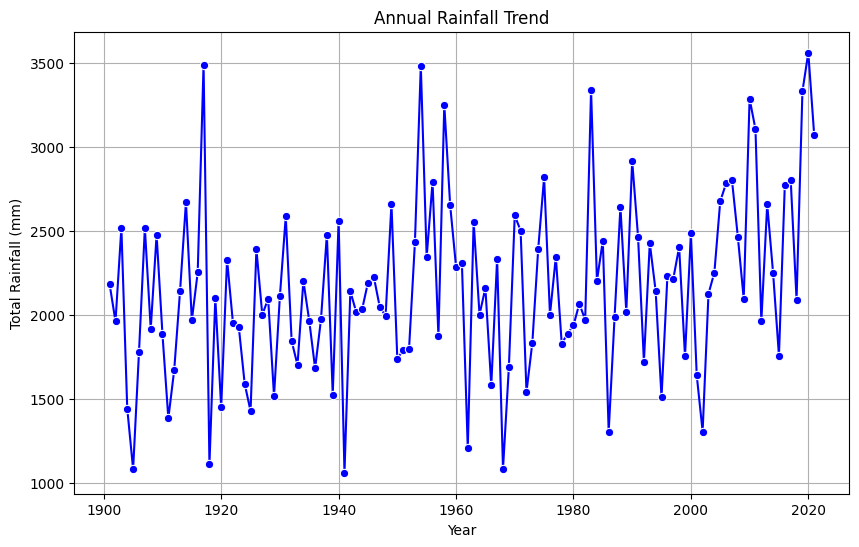

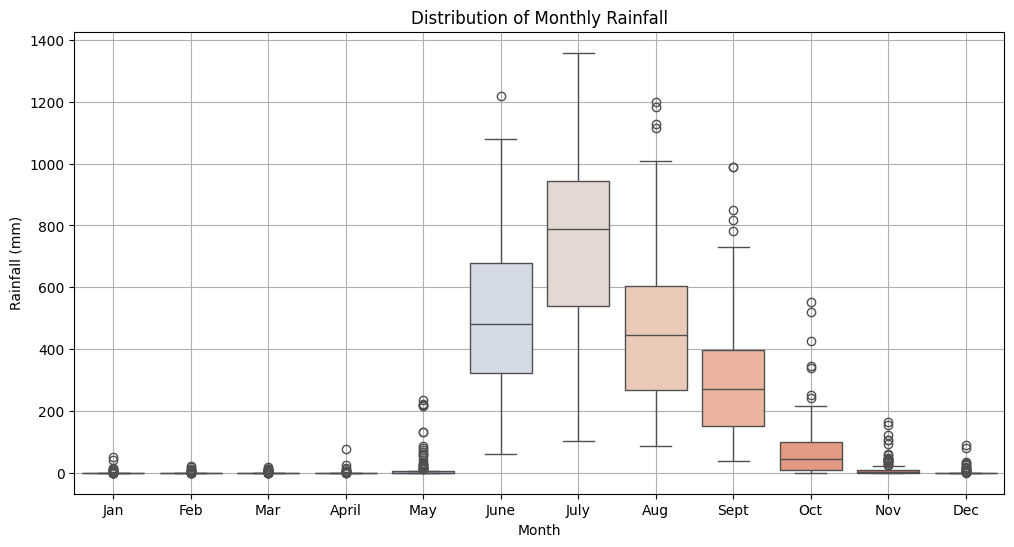

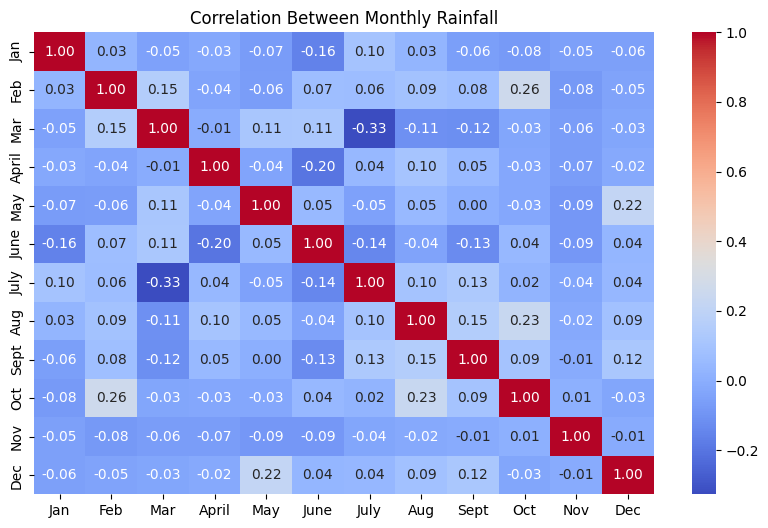

<ipython-input-4-b18ecee0db4b>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_means.index, y=monthly_means.values, palette='viridis')


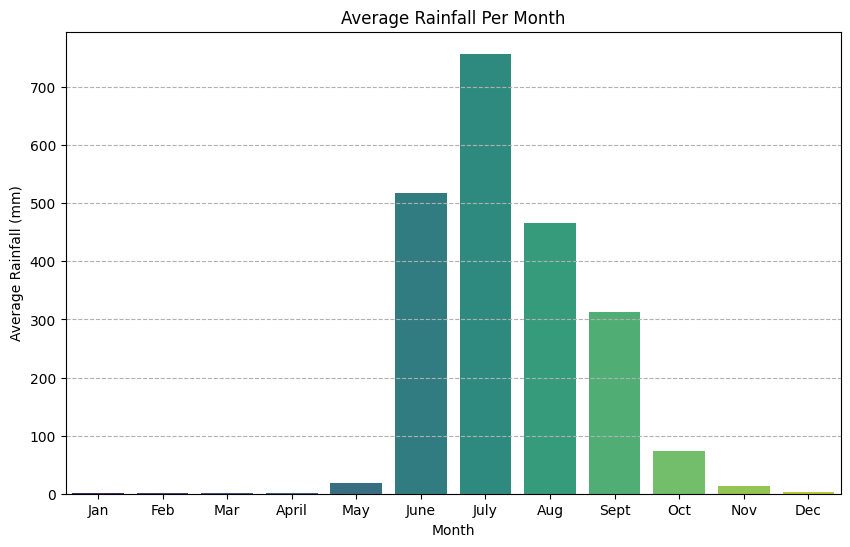

Jan: Outliers detected = 30
Feb: Outliers detected = 26
Mar: Outliers detected = 27
April: Outliers detected = 24
May: Outliers detected = 26
June: Outliers detected = 1
July: Outliers detected = 0
Aug: Outliers detected = 4
Sept: Outliers detected = 5
Oct: Outliers detected = 7
Nov: Outliers detected = 23
Dec: Outliers detected = 27


<ipython-input-4-b18ecee0db4b>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Year'], y=data['July'], palette='coolwarm')


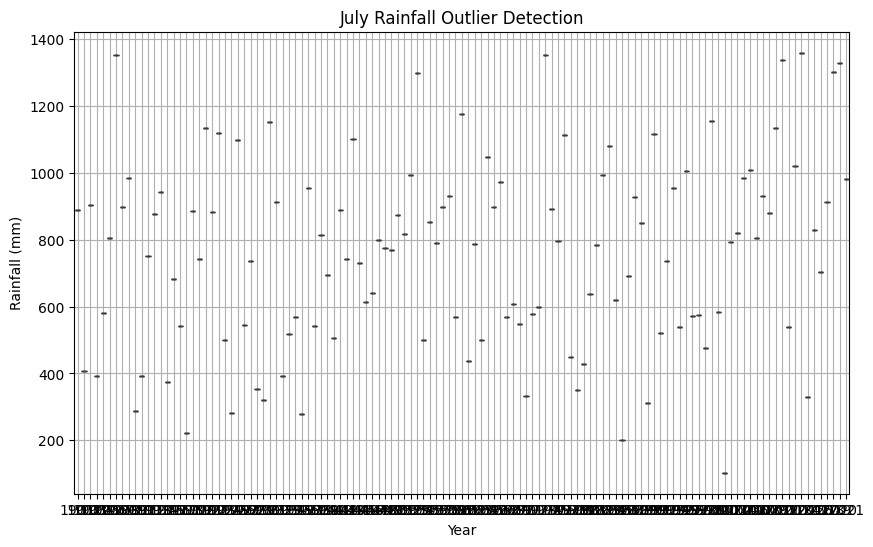

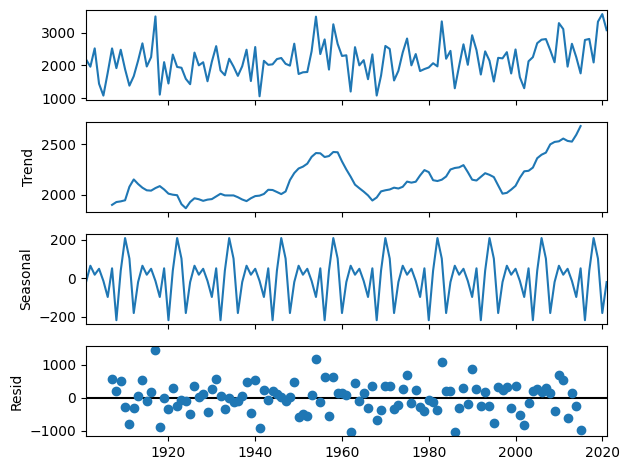

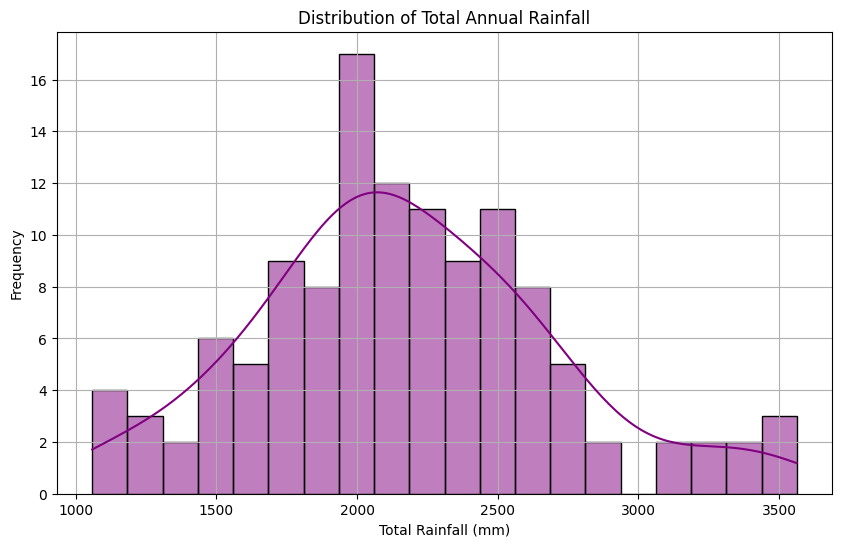


Summary Statistics of Monthly Rainfall:
              Jan         Feb         Mar       April         May  \
count  121.000000  121.000000  121.000000  121.000000  121.000000   
mean     1.567235    0.929358    0.869231    1.428458   18.183632   
std      6.462247    3.077050    2.890032    7.371307   48.628812   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.355001   
75%      0.000000    0.152298    0.000000    0.194165    4.208322   
max     51.348290   21.107118   18.252996   75.541818  234.392757   

              June         July          Aug        Sept         Oct  \
count   121.000000   121.000000   121.000000  121.000000  121.000000   
mean    517.854402   757.407412   465.600818  312.885747   73.983526   
std     251.067016   285.836188   249.072915  205.135368   96.686113   
min      61.058662   103.209194    87.493370   36

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
data = pd.read_csv('/content/mumbai-monthly-rains.csv')

# 1. Basic Information and Statistics
print("\nDataset Information:")
print(data.info())

print("\nDescriptive Statistics:")
print(data.describe())

# 2. Check for Missing Values
print("\nMissing Values Per Column:")
print(data.isnull().sum())

# 3. Total Rainfall Per Year (Sum of Monthly Data)
data['Total'] = data.iloc[:, 1:13].sum(axis=1)
print("\nAnnual Rainfall Totals:")
print(data[['Year', 'Total']])

# 4. Line Plot of Annual Rainfall Trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['Year'], y=data['Total'], marker='o', color='blue')
plt.title('Annual Rainfall Trend')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid()
plt.show()

# 5. Box Plot of Monthly Rainfall
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.iloc[:, 1:13], palette='coolwarm')
plt.title('Distribution of Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid()
plt.show()

# 6. Heatmap of Monthly Rainfall Correlation
monthly_data = data.iloc[:, 1:13]
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Monthly Rainfall')
plt.show()

# 7. Seasonal Analysis: Monthly Averages
monthly_means = monthly_data.mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_means.index, y=monthly_means.values, palette='viridis')
plt.title('Average Rainfall Per Month')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.grid(axis='y', linestyle='--')
plt.show()

# 8. Outlier Detection and Visualization
for col in data.columns[1:13]:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: Outliers detected = {len(outliers)}")

# Plot Outliers for a Specific Month (e.g., July)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Year'], y=data['July'], palette='coolwarm')
plt.title('July Rainfall Outlier Detection')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid()
plt.show()

# 9. Time Series Decomposition
time_series = data[['Year', 'Total']]
time_series.set_index('Year', inplace=True)
decomposition = seasonal_decompose(time_series, model='additive', period=12)
decomposition.plot()
plt.show()

# 10. Distribution of Total Annual Rainfall
plt.figure(figsize=(10, 6))
sns.histplot(data['Total'], bins=20, kde=True, color='purple')
plt.title('Distribution of Total Annual Rainfall')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 11. Summary Statistics of Monthly and Total Rainfall
print("\nSummary Statistics of Monthly Rainfall:")
print(monthly_data.describe())

print("\nSummary Statistics of Annual Rainfall:")
print(data['Total'].describe())

# **FEATURE ENGINEEING**

In [5]:
# Feature Engineering: Add trend and seasonal features
data['Trend'] = np.arange(len(data))  # Linear trend
data['Season'] = np.tile(np.arange(1, 13), len(data) // 12 + 1)[:len(data)]  # Month index

# Create lag features
for lag in range(1, 4):  # Lag-1 to Lag-3
    data[f"Total_lag{lag}"] = data['Total'].shift(lag)

# Drop rows with NaN values due to lagging
data.dropna(inplace=True)


In [6]:
# Outlier Handling: Clip outliers using IQR
for col in data.columns[1:13]:  # Monthly columns only
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.clip(data[col], lower_bound, upper_bound)

# Replace zero rainfall values with NaN and forward-fill
data.replace(0, np.nan, inplace=True)
data.fillna(method='ffill', inplace=True)

<ipython-input-6-e1fe0b62a91e>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# **DATA SPLITTING AND SCALING**

In [7]:
# Define features and target
X = data[['Trend', 'Season'] + [f"Total_lag{lag}" for lag in range(1, 4)]]
y = data['Total']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# **Model Training and Evaluation**

In [8]:
# Model Training and Evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} Performance: MAE={mae}, RMSE={rmse}, R^2={r2}")
    return model, mae, rmse, r2

In [9]:
# Linear Regression
lr_model, lr_mae, lr_rmse, lr_r2 = evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test, "Linear Regression")

# Random Forest
rf_model, rf_mae, rf_rmse, rf_r2 = evaluate_model(RandomForestRegressor(random_state=42), X_train, y_train, X_test, y_test, "Random Forest")

# XGBoost
xgb_model, xgb_mae, xgb_rmse, xgb_r2 = evaluate_model(XGBRegressor(random_state=42), X_train, y_train, X_test, y_test, "XGBoost")

# SARIMA for Time-Series
sarima_model = SARIMAX(time_series['Total'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit(disp=False)


Linear Regression Performance: MAE=358.07034496653523, RMSE=490.39239852052106, R^2=-0.0042167134982404875
Random Forest Performance: MAE=346.3339437498598, RMSE=469.12781665327856, R^2=0.08098551660567921
XGBoost Performance: MAE=389.3384923480547, RMSE=496.83124205726523, R^2=-0.030760532327068324


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [10]:
print("XGBoost Model Performance:")
print(f"MAE: {xgb_mae}")
print(f"RMSE: {xgb_rmse}")
print(f"R^2: {xgb_r2}")


XGBoost Model Performance:
MAE: 389.3384923480547
RMSE: 496.83124205726523
R^2: -0.030760532327068324


In [11]:
# Make predictions
sarima_predictions = sarima_results.get_forecast(steps=len(X_test)).predicted_mean

# Calculate performance metrics
sarima_mae = mean_absolute_error(y_test, sarima_predictions)
sarima_rmse = np.sqrt(mean_squared_error(y_test, sarima_predictions))
sarima_r2 = r2_score(y_test, sarima_predictions)

print("\nSARIMA Model Performance:")
print(f"MAE: {sarima_mae}")
print(f"RMSE: {sarima_rmse}")
print(f"R^2: {sarima_r2}")


SARIMA Model Performance:
MAE: 532.6902746778975
RMSE: 644.7751456116199
R^2: -0.7360273475911976


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# **MODEL IMPROVEMENT USING HYPEROARAMETER TUNING**

In [12]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Perform GridSearchCV
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model to the training data
xgb_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best Score for XGBoost:", -xgb_grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Score for XGBoost: 293942.01199068787


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model to the training data
rf_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Score for Random Forest:", -rf_grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score for Random Forest: 304625.771019977


In [14]:
#Code for Random Forest and XGBoost with Best Parameters

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Best parameters from tuning
rf_best_params = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
xgb_best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

# Initialize models with the best parameters
rf_model = RandomForestRegressor(**rf_best_params, random_state=42)
xgb_model = XGBRegressor(**xgb_best_params, random_state=42)

# Train Random Forest
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Performance:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R^2: {rf_r2}")

# Train XGBoost
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_r2 = r2_score(y_test, xgb_predictions)

print("\nXGBoost Performance:")
print(f"MAE: {xgb_mae}")
print(f"RMSE: {xgb_rmse}")
print(f"R^2: {xgb_r2}")


Random Forest Performance:
MAE: 361.9183146503369
RMSE: 478.93659091687823
R^2: 0.042153265410116214

XGBoost Performance:
MAE: 361.7087788727526
RMSE: 468.2074432861938
R^2: 0.08458797507808025


Year       int64
Jan      float64
Feb      float64
Mar      float64
April    float64
May      float64
June     float64
July     float64
Aug      float64
Sept     float64
Oct      float64
Nov      float64
Dec      float64
Total    float64
dtype: object


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 12, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0203 - val_loss: 0.0285
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0181 - val_loss: 0.0281
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0206 - val_loss: 0.0284
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 - val_loss: 0.0282
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0183 - val_loss: 0.0275
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0160 - val_loss: 0.0273
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0222 - val_loss: 0.0275
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0185 - val_loss: 0.0268
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0182 - val_loss: 0.0265
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0206 - val_loss: 0.0257
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0206 - val_loss: 0.0252
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0178 - val_

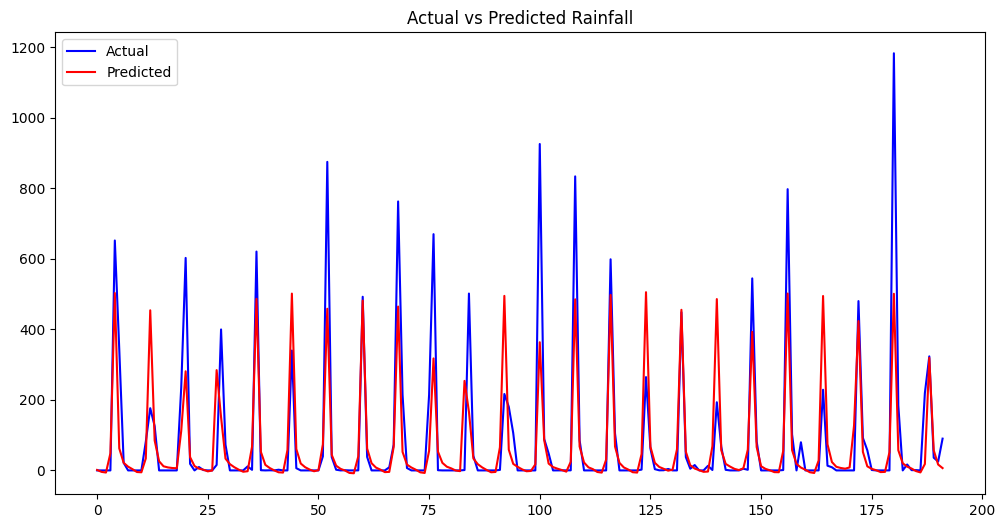

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load and preprocess the data
df = pd.read_csv("mumbai-monthly-rains.csv")  # Replace with your actual file

# Check the data types of the 'Year' and 'Month' columns
print(df.dtypes)  # Print data types to identify any issues

# Convert 'Year' to datetime if it's not already
# Assuming 'Year' is a string column with values like '2023'
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Alternatively, if 'Year' is an integer column:
# df['Year'] = pd.to_datetime(df['Year'].astype(str), format='%Y')

df.set_index('Year', inplace=True)

# Aggregate monthly data into a single column if needed
rainfall_data = df.loc[:, 'Jan':'Dec'].stack().reset_index()
rainfall_data.columns = ['Year', 'Month', 'Rainfall']

# Modified line to address the ValueError
rainfall_data['Date'] = pd.to_datetime(rainfall_data['Year'].dt.year.astype(str) + '-' + rainfall_data['Month'], format='%Y-%b', errors='coerce')

# Drop rows with invalid dates (NaT)
rainfall_data.dropna(subset=['Date'], inplace=True)

# The 'Date' column is now created and available
rainfall_data = rainfall_data.set_index('Date').sort_index() # Now this line should work correctly

# ... (rest of your code) ...
# Remove this line, it's incorrect and causes an error:
# rainfall_data = rainfall_data.set_index('').sort_index()

# Prepare the time series for training
rainfall_series = rainfall_data['Rainfall']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(rainfall_series.values.reshape(-1, 1))

# Create sequences for LSTM input
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 12  # Use the past 12 months to predict the next month
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and test sets
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Inverse scaling
y_test = scaler.inverse_transform(y_test)  # Inverse scaling

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("LSTM Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.show()

# Forecast future values
def forecast_lstm(model, data, sequence_length, steps):
    forecast = []
    input_seq = data[-sequence_length:]
    for _ in range(steps):
        input_seq = input_seq.reshape(1, sequence_length, 1)
        pred = model.predict(input_seq, verbose=0)
        forecast.append(pred[0, 0])
    return scaler.inverse_transform(np.array(forecast).reshape(-1, 1))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 5, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 901ms/step - loss: 0.2154 - val_loss: 0.3033
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1498 - val_loss: 0.2369
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0965 - val_loss: 0.1588
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0689 - val_loss: 0.0819
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0460 - val_loss: 0.0514
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0533 - val_loss: 0.0553
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0367 - val_loss: 0.0684
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0430 - val_loss: 0.0789
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - val_loss: 0.0747
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0424 - val_loss: 0.0660
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0388 - val_loss: 0.0669
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0406 - val_loss: 0.0632
Epoch 13

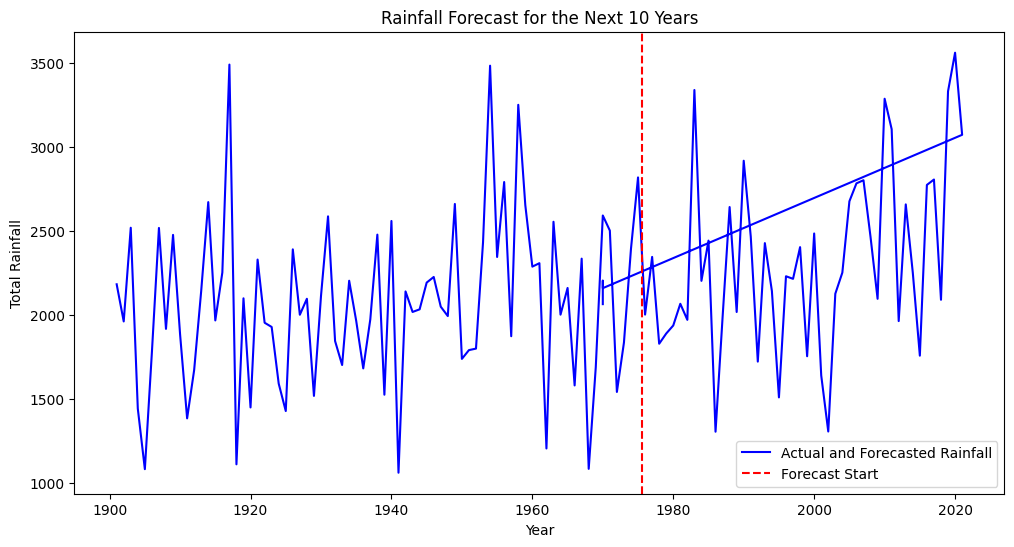

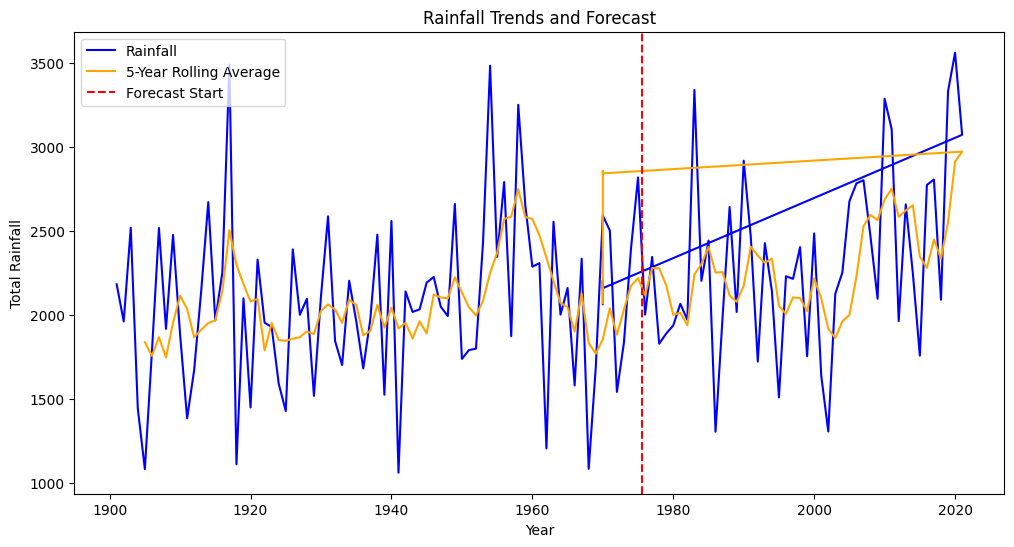

10-Year Rainfall Forecast:
   Year  Forecasted Rainfall
0  2022          2159.406006
1  2023          2161.527100
2  2024          2203.803955
3  2025          2175.237549
4  2026          2120.821289
5  2027          2071.438721
6  2028          2071.068848
7  2029          2071.150146
8  2030          2067.796387
9  2031          2064.099854


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv("mumbai-monthly-rains.csv")  # Replace with your actual file
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Ensure 'Year' is in datetime format
df.set_index('Year', inplace=True)

# Aggregate monthly data into total yearly rainfall
df['Total'] = df.iloc[:, :-1].sum(axis=1)
rainfall_series = df['Total']

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(rainfall_series.values.reshape(-1, 1))

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 5  # Use the past 5 years to predict the next year
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and test sets
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the LSTM model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

def forecast_future(model, data, sequence_length, steps):
    forecast = []
    input_seq = data[-sequence_length:]
    for _ in range(steps):
        input_seq = input_seq.reshape(1, sequence_length, 1)
        pred = model.predict(input_seq, verbose=0)
        forecast.append(pred[0, 0])
        # The problem is with the following line:
        # input_seq = np.append(input_seq[0, 1:, :], [[pred]], axis=0)
        # pred has shape (1, 1) (it's a single prediction).
        # input_seq[0, 1:, :] has shape (sequence_length - 1, 1)
        # [[pred]] creates a 4-dimensional array with shape (1, 1, 1, 1)

        # Fix:
        input_seq = np.append(input_seq[0, 1:, :], pred.reshape(1, 1), axis=0) # Reshape pred to (1, 1) to match input_seq
    return np.array(forecast)

future_forecast_scaled = forecast_future(model, scaled_data, sequence_length, 10)
future_forecast = scaler.inverse_transform(future_forecast_scaled.reshape(-1, 1))

# Append future years for visualization
last_year = df.index[-1].year
future_years = [last_year + i for i in range(1, 11)]
forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted Rainfall': future_forecast.flatten()})

# Combine actual and forecasted data
df.reset_index(inplace=True)
all_data = pd.concat([df[['Year', 'Total']], forecast_df.rename(columns={'Forecasted Rainfall': 'Total'})])
all_data.set_index('Year', inplace=True)

# Plot actual vs forecasted rainfall
plt.figure(figsize=(12, 6))
plt.plot(all_data.index, all_data['Total'], label='Actual and Forecasted Rainfall', color='blue')
plt.axvline(x=last_year, color='red', linestyle='--', label='Forecast Start')
plt.title('Rainfall Forecast for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.legend()
plt.show()

# Additional EDA: Rolling average and trend analysis
plt.figure(figsize=(12, 6))
rolling_avg = all_data['Total'].rolling(window=5).mean()
plt.plot(all_data.index, all_data['Total'], label='Rainfall', color='blue')
plt.plot(all_data.index, rolling_avg, label='5-Year Rolling Average', color='orange')
plt.axvline(x=last_year, color='red', linestyle='--', label='Forecast Start')
plt.title('Rainfall Trends and Forecast')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.legend()
plt.show()

# Print forecasted values
print("10-Year Rainfall Forecast:")
print(forecast_df)

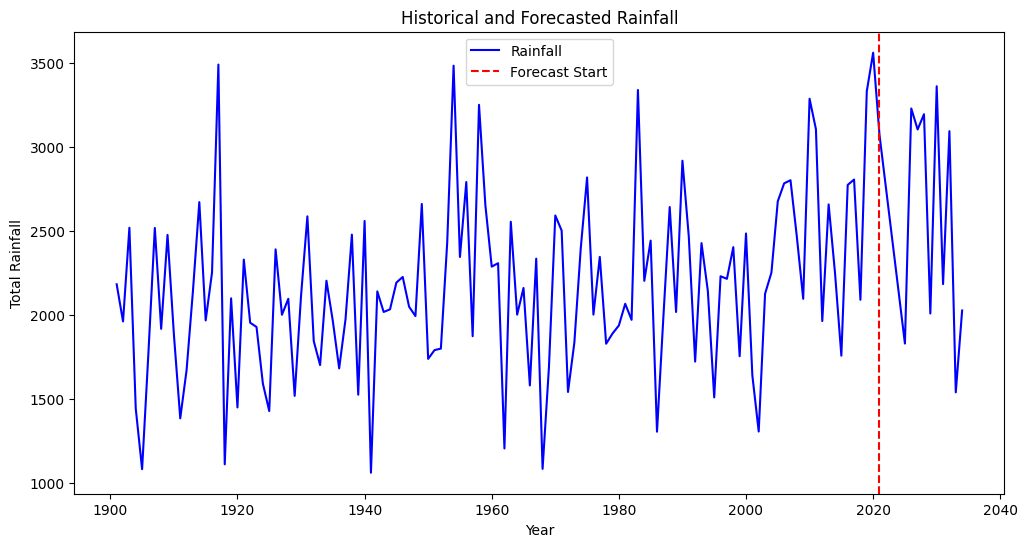

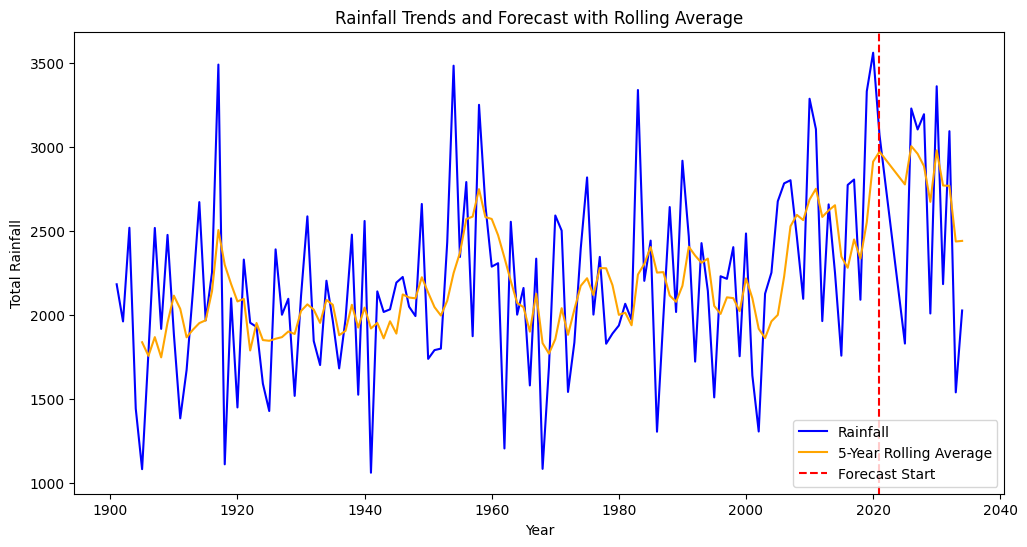

<ipython-input-19-ee29c2c526c8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=historical_df['Year'] % 10, y=historical_df['Total'], palette='viridis')


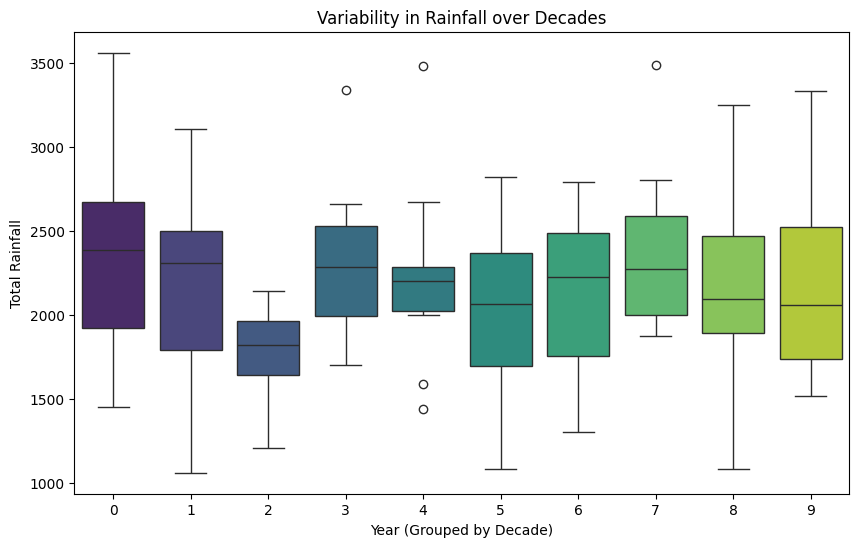

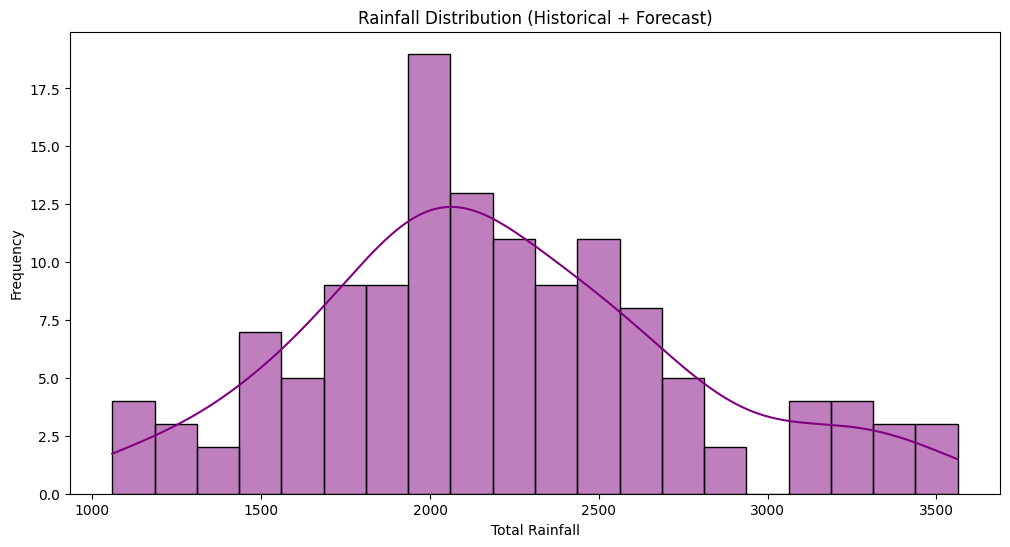

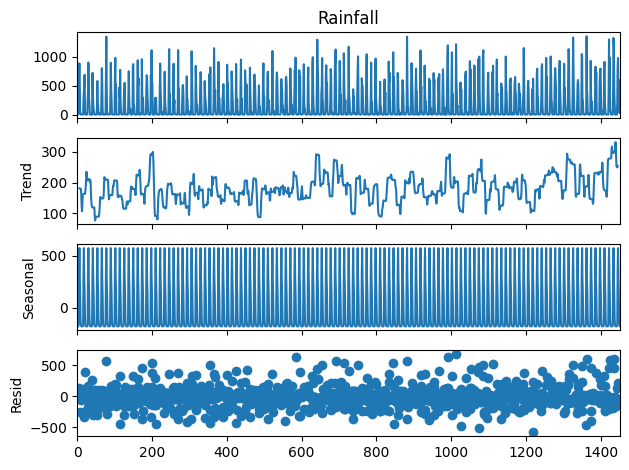

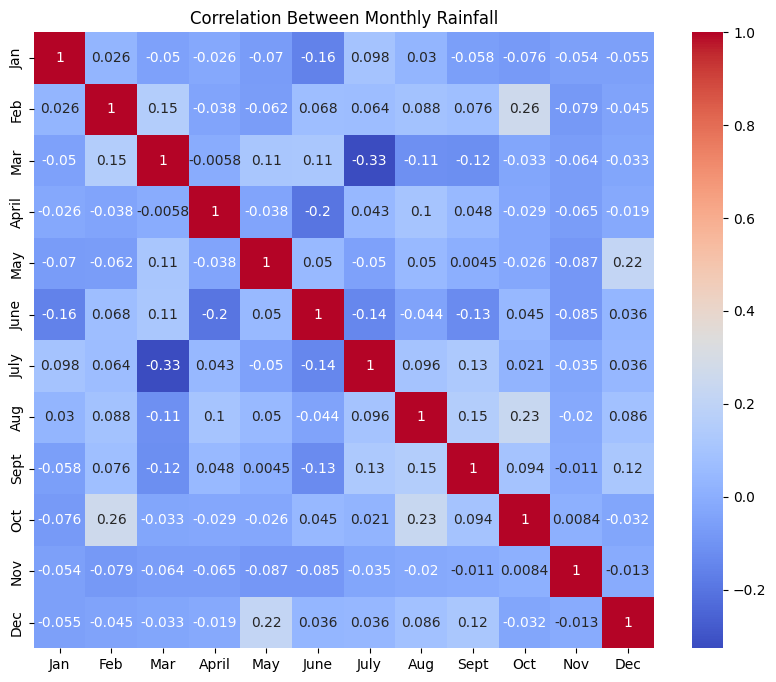

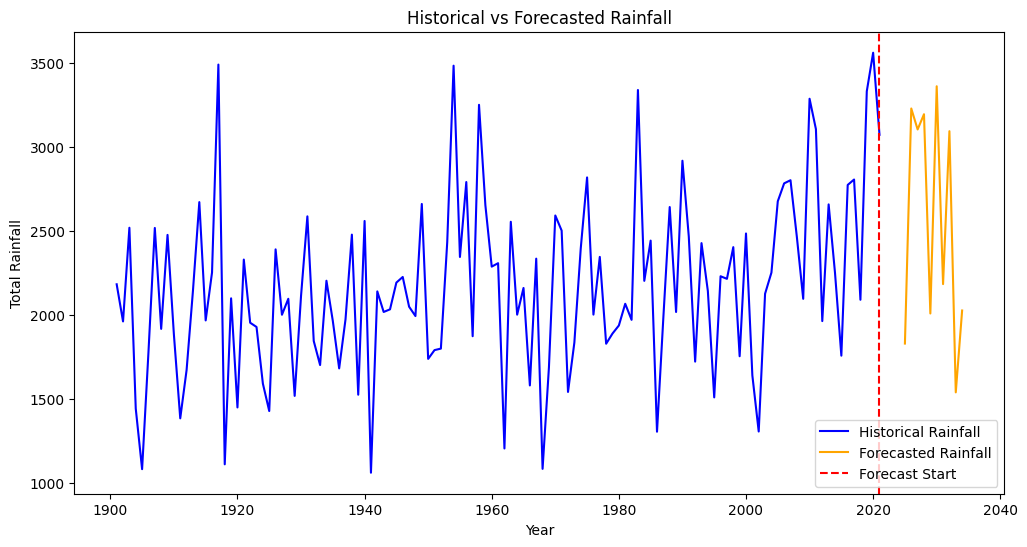

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load historical data
df = pd.read_csv("mumbai-monthly-rains.csv")  # Replace with your file
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Ensure 'Year' is datetime
df.set_index('Year', inplace=True)

# Aggregate monthly data into yearly totals
df['Total'] = df.iloc[:, :-1].sum(axis=1)
historical_data = df['Total']

# Forecast data (replace with actual forecast results from LSTM or any model)
# Simulated example for merging with forecast data
future_years = [2025 + i for i in range(10)]  # Replace 2025 with the last year in your historical data
forecasted_rainfall = np.random.uniform(1500, 3500, size=10)  # Replace with LSTM forecast results
forecast_df = pd.DataFrame({'Year': future_years, 'Total': forecasted_rainfall})

# Combine historical and forecast data
historical_df = pd.DataFrame({'Year': historical_data.index.year, 'Total': historical_data.values})
combined_data = pd.concat([historical_df, forecast_df])
combined_data.set_index('Year', inplace=True)

# ------------------- EDA Techniques -------------------

# 1. Line plot: Historical vs Forecasted Rainfall
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['Total'], label='Rainfall', color='blue')
plt.axvline(x=historical_df['Year'].iloc[-1], color='red', linestyle='--', label='Forecast Start')
plt.title('Historical and Forecasted Rainfall')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.legend()
plt.show()

# 2. Rolling average and trend analysis
plt.figure(figsize=(12, 6))
rolling_avg = combined_data['Total'].rolling(window=5).mean()
plt.plot(combined_data.index, combined_data['Total'], label='Rainfall', color='blue')
plt.plot(combined_data.index, rolling_avg, label='5-Year Rolling Average', color='orange')
plt.axvline(x=historical_df['Year'].iloc[-1], color='red', linestyle='--', label='Forecast Start')
plt.title('Rainfall Trends and Forecast with Rolling Average')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.legend()
plt.show()

# 3. Boxplot: Variability in historical rainfall
plt.figure(figsize=(10, 6))
sns.boxplot(x=historical_df['Year'] % 10, y=historical_df['Total'], palette='viridis')
plt.title('Variability in Rainfall over Decades')
plt.xlabel('Year (Grouped by Decade)')
plt.ylabel('Total Rainfall')
plt.show()

# 4. Histogram and KDE: Distribution of Rainfall
plt.figure(figsize=(12, 6))
sns.histplot(combined_data['Total'], kde=True, color='purple', bins=20)
plt.title('Rainfall Distribution (Historical + Forecast)')
plt.xlabel('Total Rainfall')
plt.ylabel('Frequency')
plt.show()

# 5. Seasonal decomposition (if monthly data is available)
from statsmodels.tsa.seasonal import seasonal_decompose

if 'Jan' in df.columns:  # Check if monthly data exists
    monthly_rainfall = df.loc[:, 'Jan':'Dec'].stack().reset_index()
    monthly_rainfall.columns = ['Year', 'Month', 'Rainfall']
    # Replace the problematic line with this:
    monthly_rainfall['Date'] = pd.to_datetime(monthly_rainfall['Year'].dt.year.astype(str) + '-' + monthly_rainfall['Month'].str[:3], format='%Y-%b', errors='coerce')
    monthly_rainfall.dropna(subset=['Date'], inplace=True) # Drop any rows that still result in NaT (Not a Time) after the conversion
    decomposition = seasonal_decompose(monthly_rainfall['Rainfall'], model='additive', period=12)
    decomposition.plot()
    plt.show()

# 6. Correlation Heatmap (if monthly data is available)
if 'Jan' in df.columns:
    monthly_totals = df.loc[:, 'Jan':'Dec']
    plt.figure(figsize=(10, 8))
    sns.heatmap(monthly_totals.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Between Monthly Rainfall')
    plt.show()

# 7. Forecasted vs Historical Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=historical_df, x='Year', y='Total', label='Historical Rainfall', color='blue')
sns.lineplot(data=forecast_df, x='Year', y='Total', label='Forecasted Rainfall', color='orange')
plt.axvline(x=historical_df['Year'].iloc[-1], color='red', linestyle='--', label='Forecast Start')
plt.title('Historical vs Forecasted Rainfall')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.legend()
plt.show()

In [21]:
import pickle

# Save the model using the correct variable name 'model'
with open('rainfall_model.pkl', 'wb') as f:
    pickle.dump(model, f) # Changed 'trained_model' to 'model'